In [1]:
import altair as alt
import pandas as pd

alt.renderers.enable('png')

RendererRegistry.enable('png')

In [2]:
tripadvisor_review = pd.read_csv("datasets/tripadvisor_review.csv")
tripadvisor_review

User ID  art_gallery  dance_club  Juice_bar  restaurants  museums  \
0      User 1         0.93        1.80       2.29         0.62     0.80   
1      User 2         1.02        2.20       2.66         0.64     1.42   
2      User 3         1.22        0.80       0.54         0.53     0.24   
3      User 4         0.45        1.80       0.29         0.57     0.46   
4      User 5         0.51        1.20       1.18         0.57     1.54   
..        ...          ...         ...        ...          ...      ...   
975  User 976         0.74        1.12       0.30         0.53     0.88   
976  User 977         1.25        0.92       1.12         0.38     0.78   
977  User 978         0.61        1.32       0.67         0.43     1.30   
978  User 979         0.93        0.20       0.13         0.43     0.30   
979  User 980         0.93        0.56       1.13         0.51     1.34   

     resorts  parks_picnic_spots  beaches  theaters  religious_institutions  
0       2.42                3.19     2.79      1.82                    2.42  
1       3.18                3.21     2.63      1.86                    2.32  
2       1.54                3.18     2.80      1.31                    2.50  
3       1.52                3.18     2.96      1.57                    2.86  
4       2.02                3.18     2.78      1.18                    2.54  
..       ...                 ...      ...       ...                     ...  
975     1.38                3.17     2.78      0.99                    3.20  
976     1.68                3.18     2.79      1.34                    2.80  
977     1.78                3.17     2.81      1.34                    3.02  
978     0.40                3.18     2.98      1.12                    2.46  
979     2.36                3.18     2.87      1.34                    2.40  

[980 rows x 11 columns]

In [3]:
tripadvisor_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 980 non-null    object 
 1   art_gallery             980 non-null    float64
 2   dance_club              980 non-null    float64
 3   Juice_bar               980 non-null    float64
 4   restaurants             980 non-null    float64
 5   museums                 980 non-null    float64
 6   resorts                 980 non-null    float64
 7   parks_picnic_spots      980 non-null    float64
 8   beaches                 980 non-null    float64
 9   theaters                980 non-null    float64
 10  religious_institutions  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [4]:
tripadvisor_review.describe()

art_gallery  dance_club   Juice_bar  restaurants     museums  \
count   980.000000  980.000000  980.000000   980.000000  980.000000   
mean      0.893194    1.352612    1.013306     0.532500    0.939735   
std       0.326912    0.478280    0.788607     0.279731    0.437430   
min       0.340000    0.000000    0.130000     0.150000    0.060000   
25%       0.670000    1.080000    0.270000     0.410000    0.640000   
50%       0.830000    1.280000    0.820000     0.500000    0.900000   
75%       1.020000    1.560000    1.572500     0.580000    1.200000   
max       3.220000    3.640000    3.620000     3.440000    3.300000   

          resorts  parks_picnic_spots     beaches    theaters  \
count  980.000000          980.000000  980.000000  980.000000   
mean     1.842898            3.180939    2.835061    1.569439   
std      0.539538            0.007824    0.137505    0.364629   
min      0.140000            3.160000    2.420000    0.740000   
25%      1.460000            3.180000    2.740000    1.310000   
50%      1.800000            3.180000    2.820000    1.540000   
75%      2.200000            3.180000    2.910000    1.760000   
max      3.760000            3.210000    3.390000    3.170000   

       religious_institutions  
count              980.000000  
mean                 2.799224  
std                  0.321380  
min                  2.140000  
25%                  2.540000  
50%                  2.780000  
75%                  3.040000  
max                  3.660000

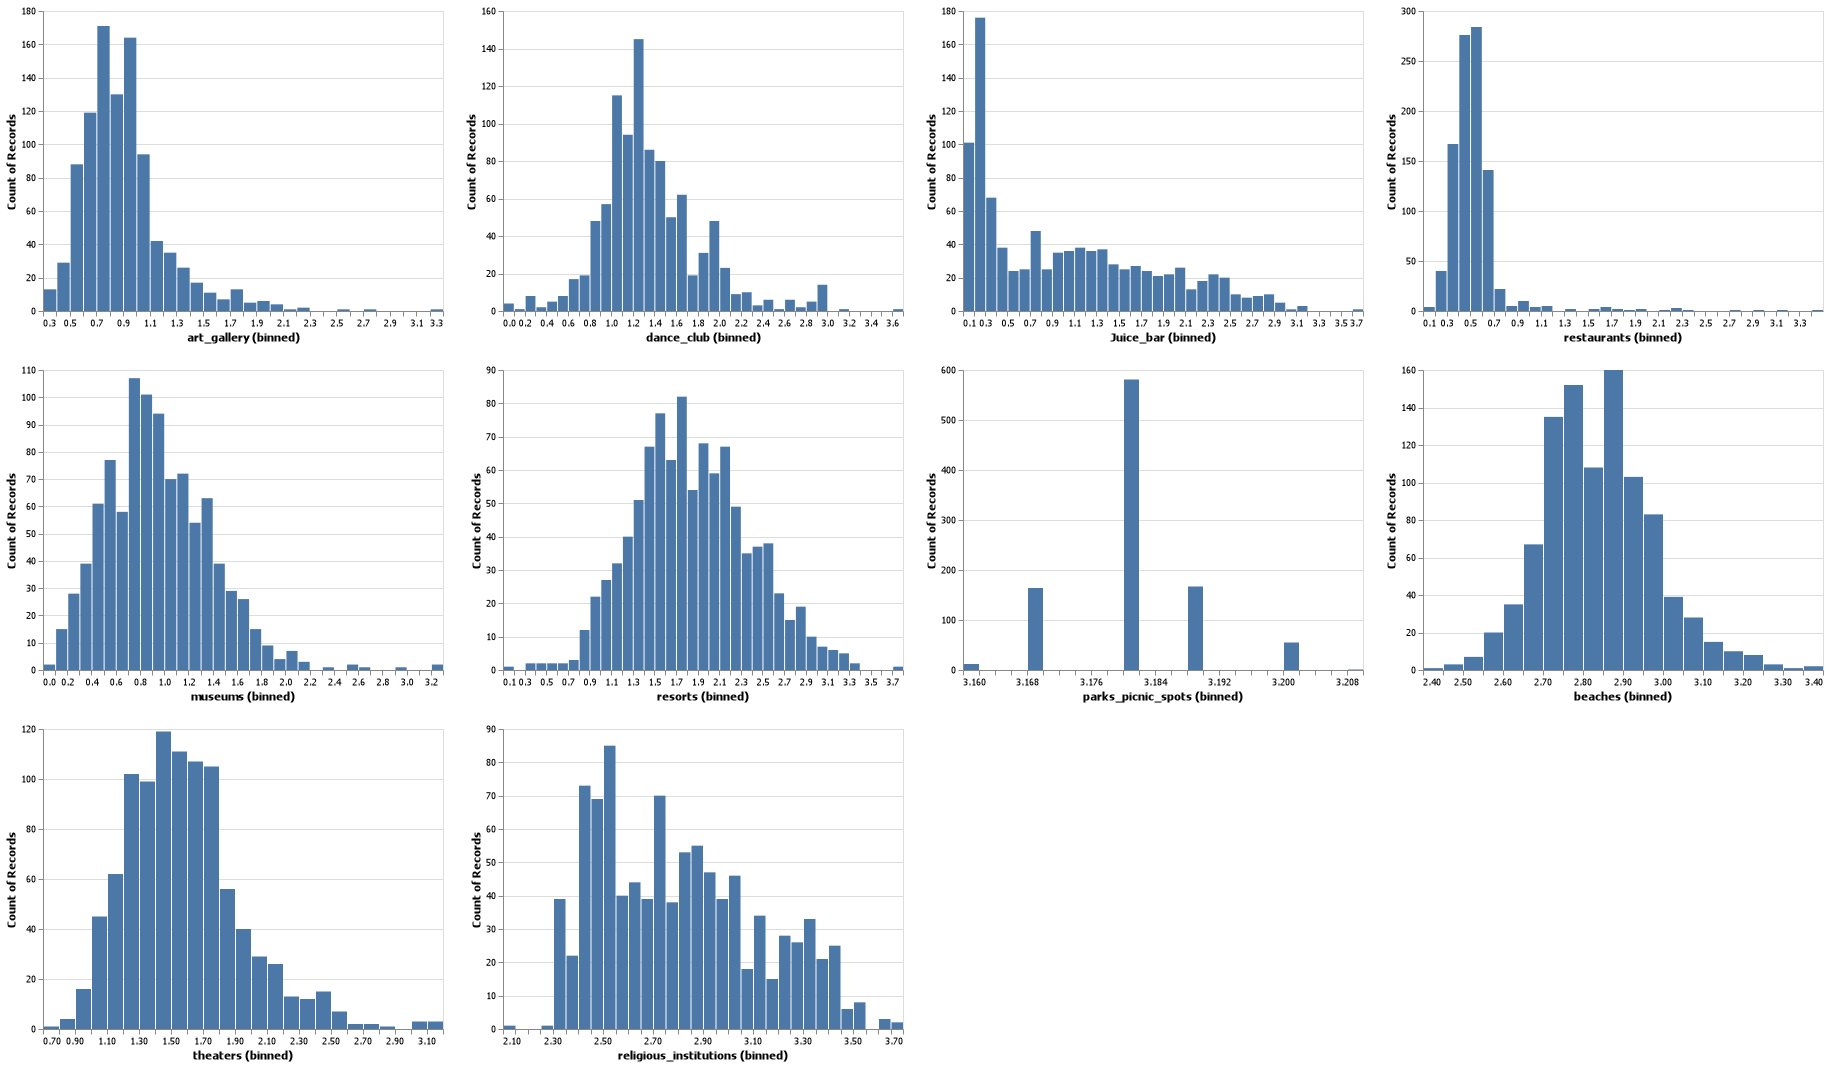

In [7]:
column_names = ['art_gallery', 'dance_club', 'Juice_bar', 'restaurants',
                'museums', 'resorts', 'parks_picnic_spots', 'beaches',
                'theaters', 'religious_institutions']

alt.Chart(tripadvisor_review).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    y='count()'
).repeat(column_names, columns=4)

**Note:** std of review for `parks_picnic_sports` seems to be too small to be used for data analysis 

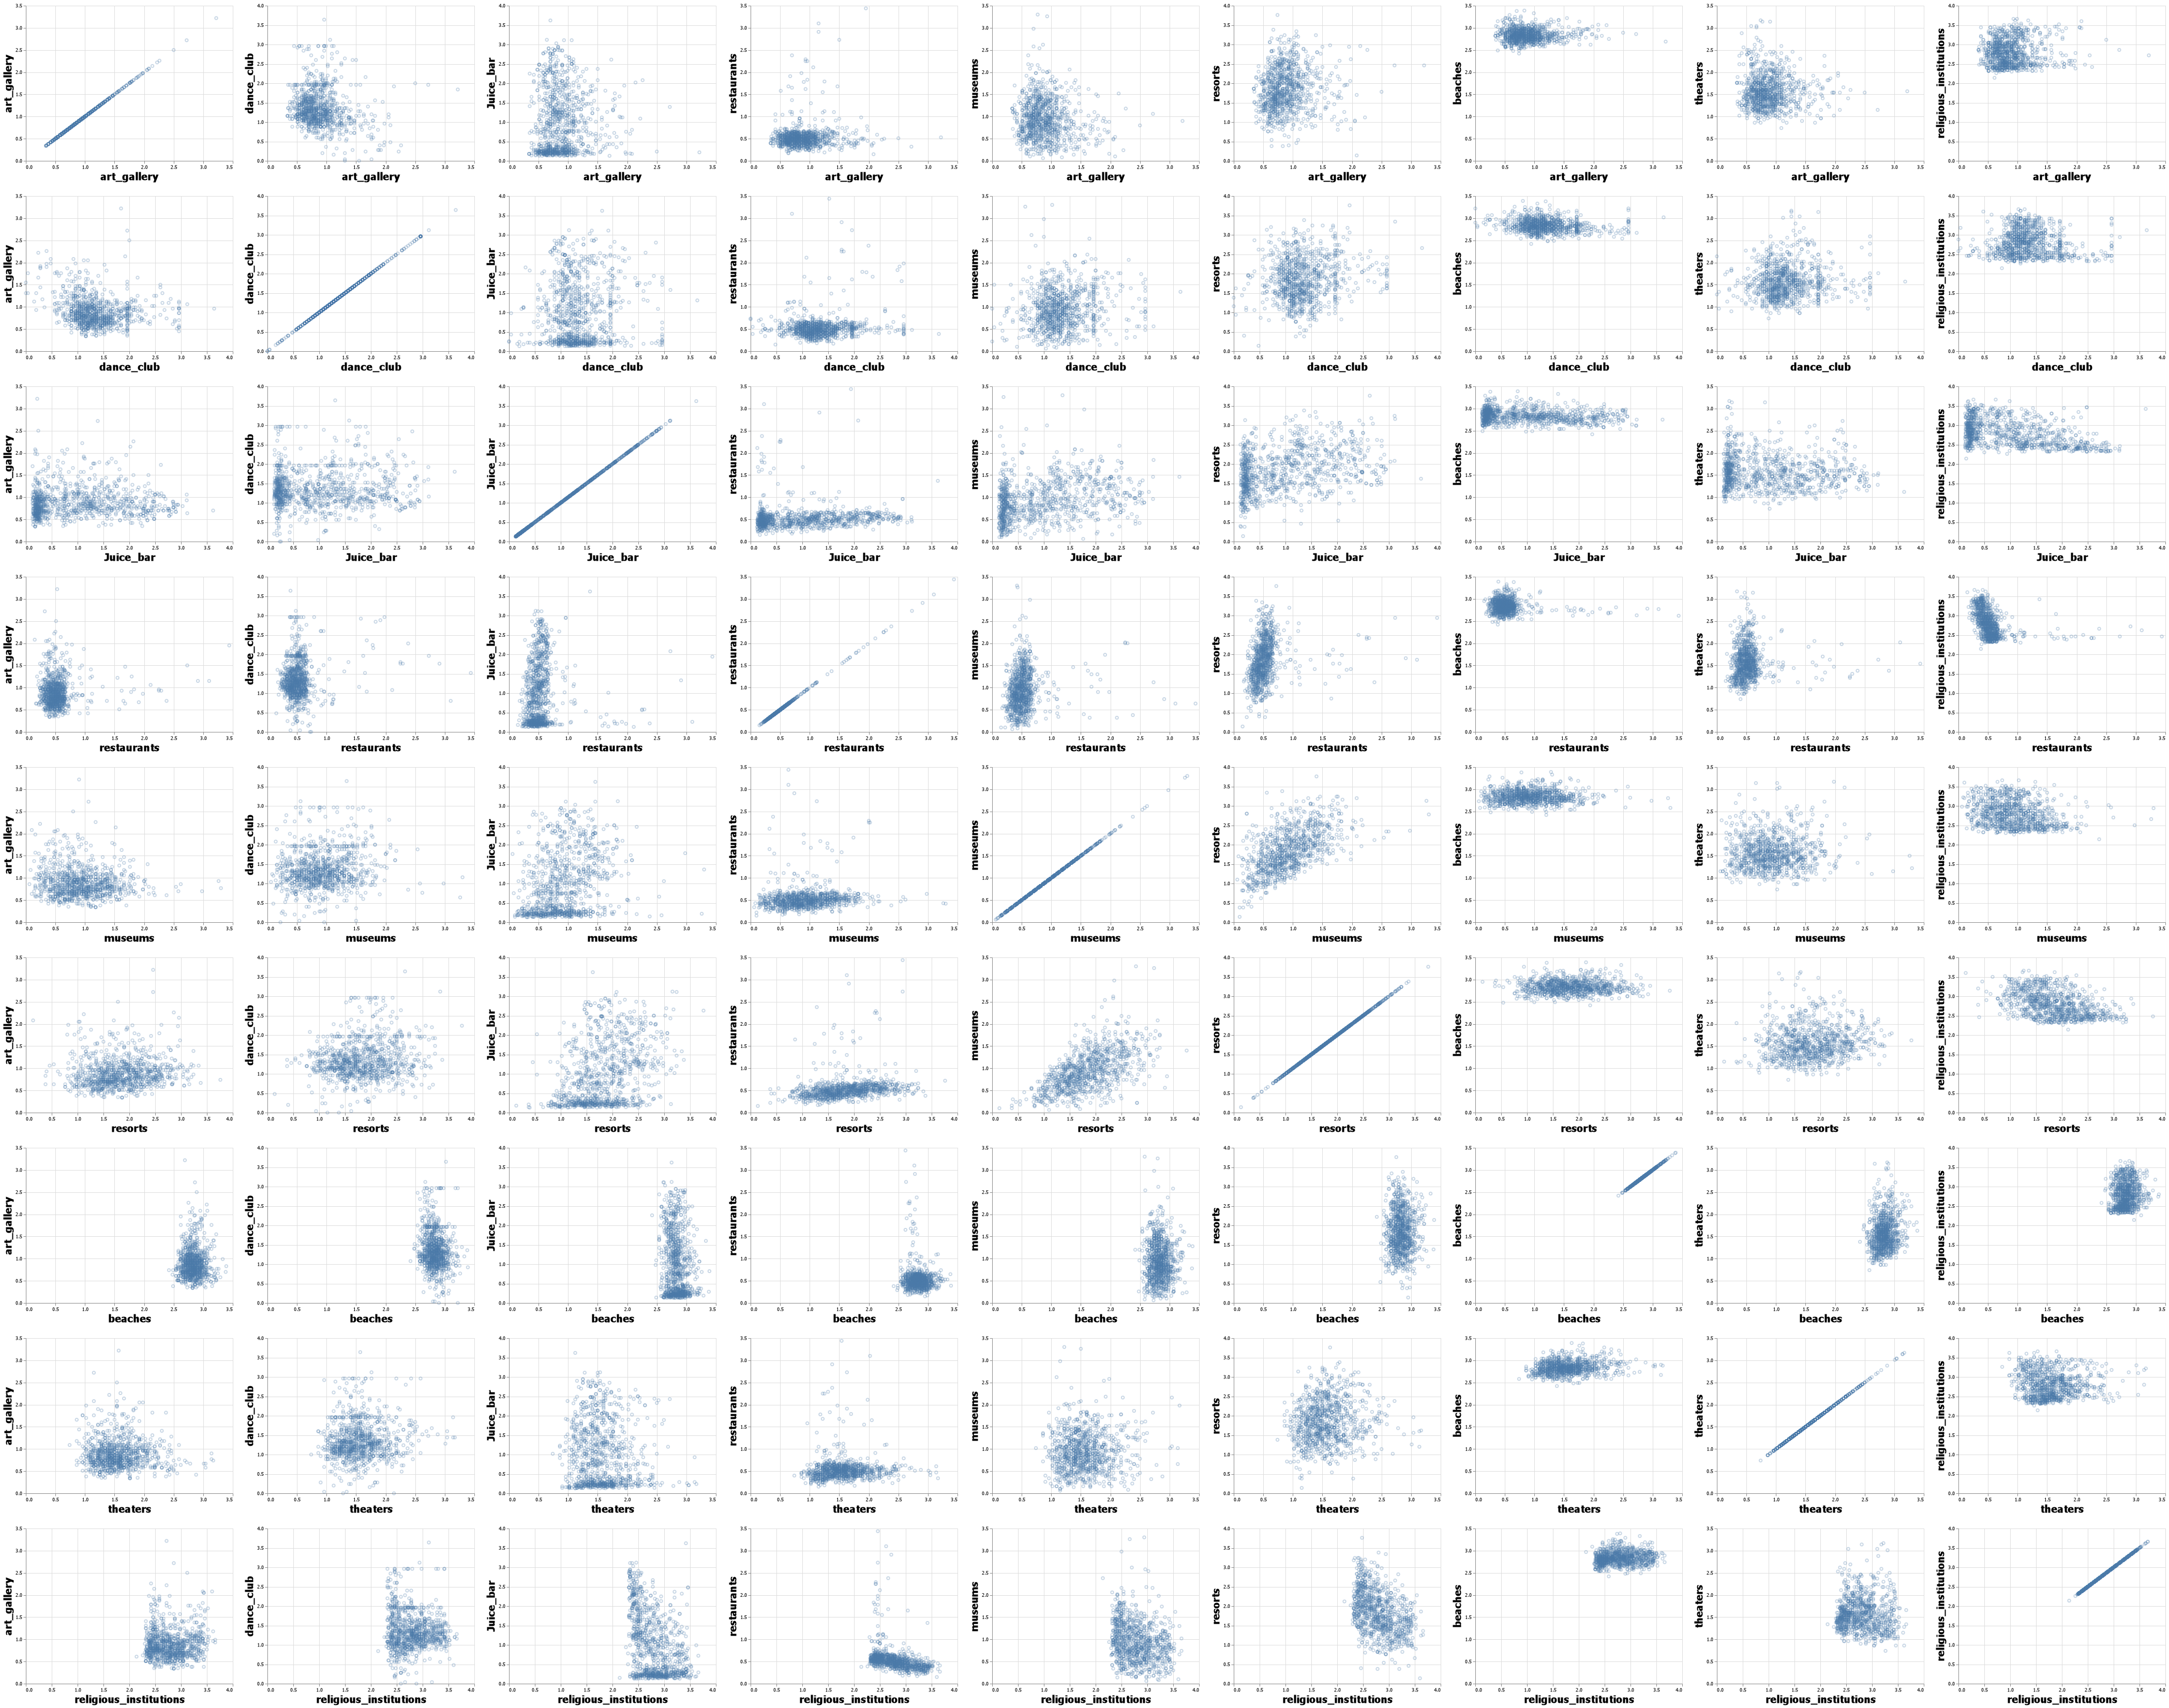

In [38]:
column_names2 = ['art_gallery', 'dance_club', 'Juice_bar', 'restaurants',
                 'museums', 'resorts', 'beaches', 'theaters',
                 'religious_institutions']

plot = alt.Chart(tripadvisor_review).mark_point(opacity=0.3).encode(
    alt.X(alt.repeat('row'), type='quantitative'),
    alt.Y(alt.repeat('column'), type='quantitative')
).repeat(
    row=column_names2,
    column=column_names2
).configure_axis(
    titleFontSize=20
)
plot
#plot.save('EDA.png')

In [41]:
restaurant = alt.Chart(tripadvisor_review).mark_point().encode(
    alt.X(alt.repeat(), type='quantitative'),
    y='restaurants'
).repeat(column_names2, columns=3).configure_axis(
    titleFontSize=20
)
restaurant.save("restaurant.png")

In [42]:
museum = alt.Chart(tripadvisor_review).mark_point().encode(
    alt.X(alt.repeat(), type='quantitative'),
    y='museums'
).repeat(column_names2, columns=3).configure_axis(
    titleFontSize=20
)

museum.save("museum.png")

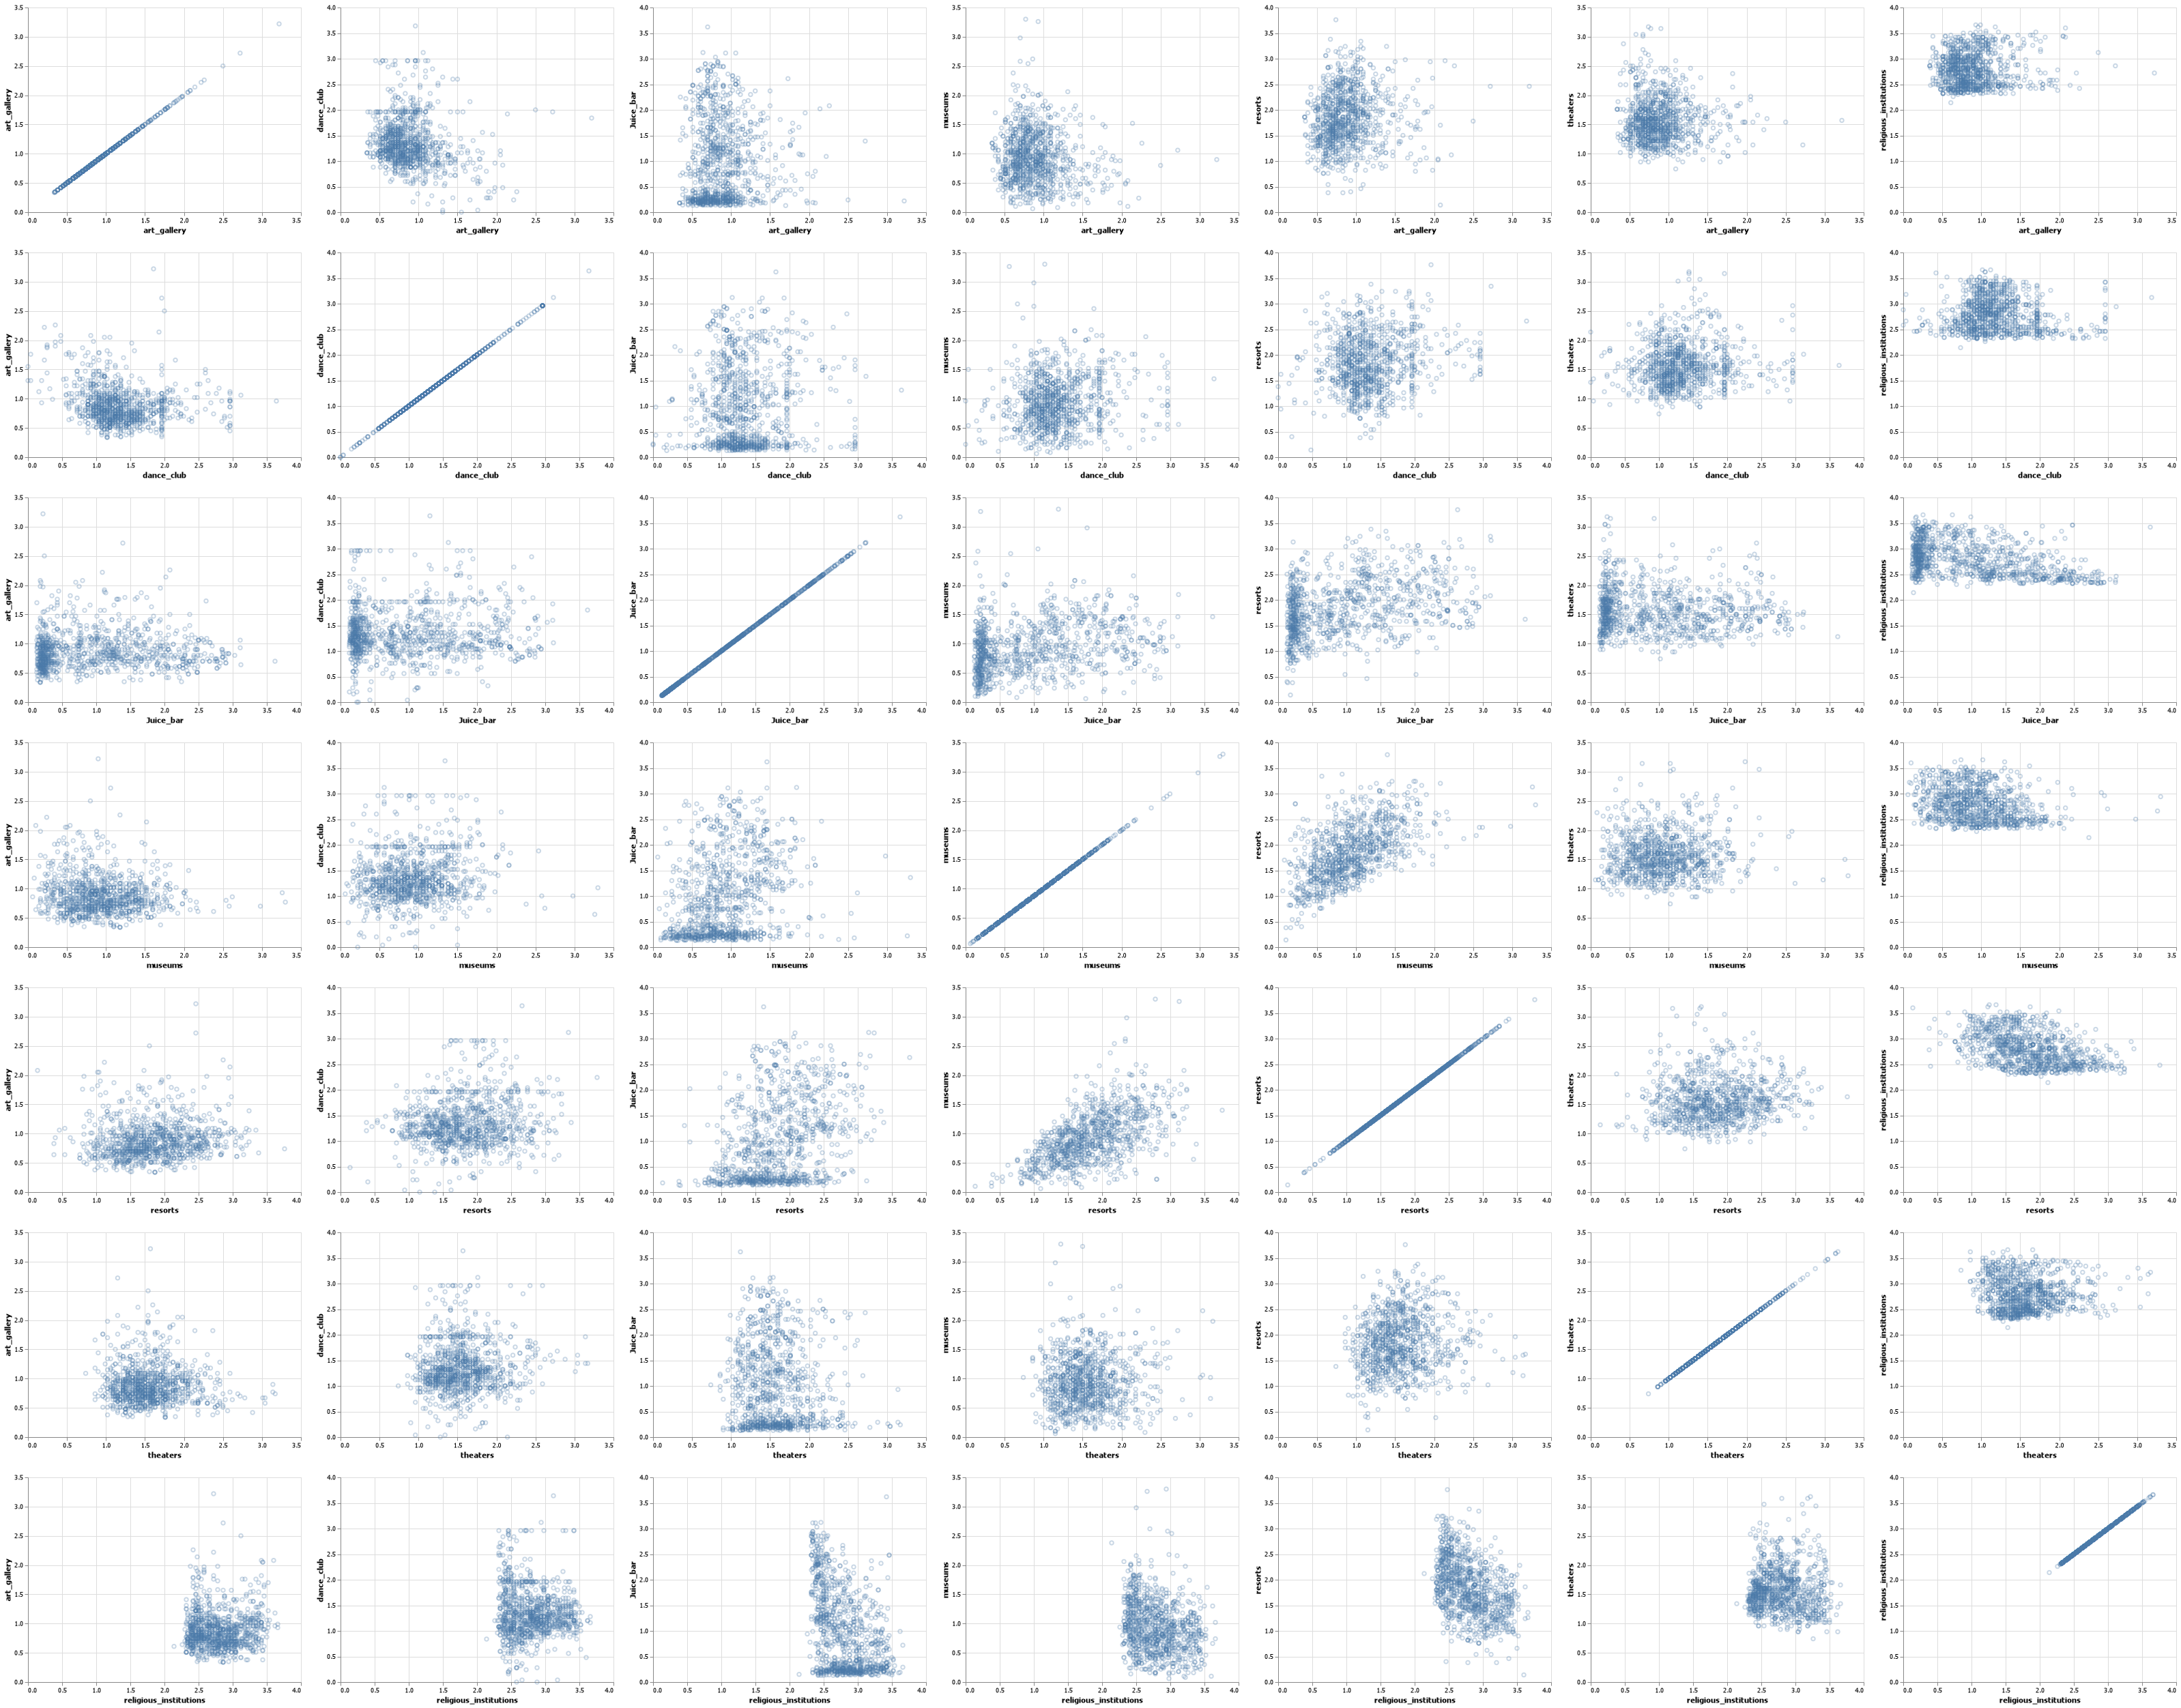

In [21]:
column_names2 = ['art_gallery', 'dance_club', 'Juice_bar',
                 'museums', 'resorts', 'theaters',
                 'religious_institutions']

alt.Chart(tripadvisor_review).mark_point(opacity=0.3).encode(
    alt.X(alt.repeat('row'), type='quantitative'),
    alt.Y(alt.repeat('column'), type='quantitative')
).repeat(
    row=column_names2,
    column=column_names2
)

In [22]:
corr_df = (
    tripadvisor_review
    .corr('spearman')
    .abs()
    .stack()
    .reset_index(name='corr'))
corr_df

level_0                 level_1      corr
0              art_gallery             art_gallery  1.000000
1              art_gallery              dance_club  0.194209
2              art_gallery               Juice_bar  0.075176
3              art_gallery             restaurants  0.018163
4              art_gallery                 museums  0.068559
..                     ...                     ...       ...
95  religious_institutions                 resorts  0.451546
96  religious_institutions      parks_picnic_spots  0.728366
97  religious_institutions                 beaches  0.140352
98  religious_institutions                theaters  0.050976
99  religious_institutions  religious_institutions  1.000000

[100 rows x 3 columns]

In [25]:
corr_df = tripadvisor_review.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
corr_df

level_0                 level_1      corr       abs
0              art_gallery             art_gallery  0.000000  0.000000
1              art_gallery              dance_club -0.194209  0.194209
2              art_gallery               Juice_bar  0.075176  0.075176
3              art_gallery             restaurants  0.018163  0.018163
4              art_gallery                 museums -0.068559  0.068559
..                     ...                     ...       ...       ...
95  religious_institutions                 resorts -0.451546  0.451546
96  religious_institutions      parks_picnic_spots -0.728366  0.728366
97  religious_institutions                 beaches  0.140352  0.140352
98  religious_institutions                theaters -0.050976  0.050976
99  religious_institutions  religious_institutions  0.000000  0.000000

[100 rows x 4 columns]

In [33]:
corr_plot = alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr', scale=alt.Scale(domain=(0, 1)))
)

corr_plot.save("corr_plot.png")